<a href="https://colab.research.google.com/github/Gabrielasants7/Portfolio-Ciencia-de-Dados/blob/main/Fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de fraude de cartão

---


Sobre o conjunto de Dados

Cada linha no conjunto de dados representa uma transação de cartão de crédito. Cada linha tem 31 variáveis.
 O recurso 'Tempo' contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. O recurso 'Valor' é o valor da transação, esse recurso pode ser usado para aprendizado sensível ao custo dependente de exemplo. A característica 'Classe' é a variável de resposta e assume valor 1 em caso de fraude e 0 caso contrário.

---

# Escopo do Projeto

Instalação da biblioteca

Importando as bibliotecas

Configuração do ambiente

Análise do conjunto de dados

Visualização

Pré-processamento do conjunto de dados

Divisão de treinamento/teste do conjunto de dados

Modelagem (árvore de decisão)

Classificador de árvore de decisão com o Scikit-Learn

Classificador de árvore de decisão com Snap ML

Avaliação dos classificadores de árvore de decisão Scikit-Learn e Snap ML


In [27]:
pip install snapml

In [28]:
#importando ás bibliotecas
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import normalize, StandardScaler
import gc, sys
import time

In [29]:
#configurando o ambiente
from google.colab import drive
drive.mount('/content/drive')
#importando o dataset
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

# mostrando ás primeiras linhas do conjunto de dados
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [30]:
n_replicas = 10

# inflando o dataset original
dados_brutos_grande = pd.DataFrame(np.repeat(df.values, n_replicas, axis=0), columns=df.columns)

print("aqui está " + str(len(dados_brutos_grande)) + " observações no conjunto de dados de fraude de cartão de crédito inflado.")
print("aqui está " + str(len(dados_brutos_grande.columns)) + " variáveis no conjunto de dados.")

# exibir as primeiras linhas no novo conjunto de dados
dados_brutos_grande.head()


aqui está 2848070 observações no conjunto de dados de fraude de cartão de crédito inflado.
aqui está 31 variáveis no conjunto de dados.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


Por motivos de confidencialidade, os nomes originais da maioria dos recursos são anonimizados como V1, V2 .. V28. Os valores dessas feições são resultado de uma transformação PCA e são numéricos. A feature Class é a variável alvo e assume dois valores: 1 em caso de fraude e 0 caso contrário

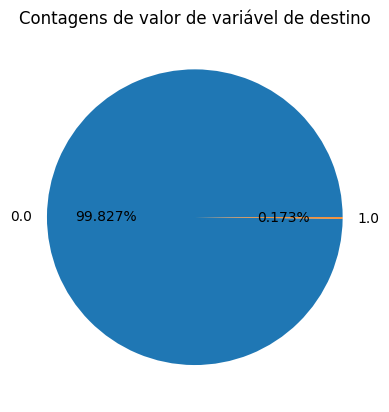

In [31]:
#obtendo um conj de classes
labels = dados_brutos_grande.Class.unique()

# contagem das classes
sizes = dados_brutos_grande.Class.value_counts().values

# plotando as contagens de valores de classe
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Contagens de valor de variável de destino')
plt.show()

0 (a transação com cartão de crédito é legítima)
1 (a transação com cartão de crédito é fraudulenta)
logo temos um problema de classificação binária. Além disso, o conjunto de dados é altamente desbalanceado, as classes de variáveis de destino não são representadas igualmente. Este caso requer atenção especial ao treinar ou ao avaliar a qualidade de um modelo. Uma maneira de lidar com esse caso no momento do treinamento é enviesar o modelo para prestar mais atenção às amostras da classe minoritária. Os modelos sob o estudo atual serão configurados para levar em consideração os pesos de classe das amostras no tempo de treinamento/ajuste.

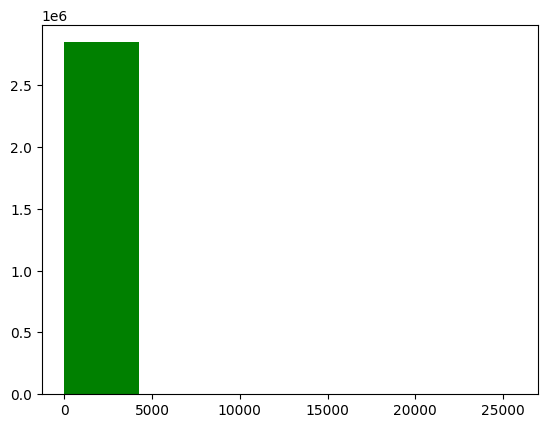

O valor mínimo é 0.0
O valor máximo é 25691.16
90% das transações tenham valor menor ou igual a  203.0


In [32]:
#visualizando o valor mínimo, máximo e o percentil
plt.hist(dados_brutos_grande.Amount.values, 6, histtype='bar', facecolor='g')
plt.show()

print("O valor mínimo é", np.min(dados_brutos_grande.Amount.values))
print("O valor máximo é", np.max(dados_brutos_grande.Amount.values))
print("90% das transações tenham valor menor ou igual a ", np.percentile(dados_brutos_grande.Amount.values, 90))

# Pré-processamento do conjunto de dados

In [33]:
#  normalizando as colunas de 1 a 30 do conjunto de dados
dados_brutos_grande.iloc[:, 1:30] = StandardScaler().fit_transform(dados_brutos_grande.iloc[:, 1:30])
data_matrix = dados_brutos_grande.values

# X: feature matrix
X = data_matrix[:, 1:30]

# y: labels vector
y = data_matrix[:, 30]

# normalizando os dados
X = normalize(X, norm="l1")

# print  a forma da matriz de recursos e o vetor de rótulos
print('X.shape=', X.shape, 'y.shape=', y.shape)

X.shape= (2848070, 29) y.shape= (2848070,)


In [34]:
#excluindo um objeto e liberando a memória usada
del dados_brutos_grande
gc.collect()

5983

# Treino e teste

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (1993649, 29) Y_train.shape= (1993649,)
X_test.shape= (854421, 29) Y_test.shape= (854421,)


# Árvore de decisão

In [36]:
#calculando os pesos de amostra dos dados desbalanceados
w_train = compute_sample_weight('balanced', y_train)

In [37]:
#importando a biblioteca DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [38]:
sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35)

In [39]:
t0 = time.time()
sklearn_dt.fit(X_train, y_train, sample_weight=w_train)
sklearn_time = time.time()-t0
print("[Scikit-Learn] Tempo de treino (s):  {0:.5f}".format(sklearn_time))

[Scikit-Learn] Tempo de treino (s):  65.79960


In [40]:
from snapml import DecisionTreeClassifier

In [41]:
snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, n_jobs=4)

In [42]:
# treinando um modelo de classificador de árvore de decisão usando o Snap ML
t0 = time.time()
snapml_dt.fit(X_train, y_train, sample_weight=w_train)
snapml_time = time.time()-t0
print("[Snap ML] Training time (s):  {0:.5f}".format(snapml_time))

[Snap ML] Training time (s):  7.57696


In [43]:
# analisando a aceleração do treinamento Snap ML vs Scikit-Learn para o classificador de árvore de decisão
# Snap ML vs Scikit-Learn training
training_speedup = sklearn_time/snapml_time
print('[Decision Tree Classifier] Snap ML vs. Scikit-Learn : {0:.2f}x '.format(training_speedup))

[Decision Tree Classifier] Snap ML vs. Scikit-Learn : 8.68x 


In [44]:
#executando a inferência em ambos os classificadores e calculando as probabilidades das amostras de teste pertencentes à classe de transações fraudulentas.
sklearn_pred = sklearn_dt.predict_proba(X_test)[:,1]
snapml_pred = snapml_dt.predict_proba(X_test)[:,1]

In [45]:
#pontuação ROC-AUC das previsões de ambos os classificadores
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))

snapml_roc_auc = roc_auc_score(y_test, snapml_pred)
print('[Snap ML] ROC-AUC score : {0:.3f}'.format(snapml_roc_auc))

[Scikit-Learn] ROC-AUC score : 0.966
[Snap ML] ROC-AUC score : 0.966


Como podem ver os modelos utilizados se saiu muito bem e se igualaram na pontuação , porém,  em questão de  rapidez o Snap ML executa a rotina de treinamento várias vezes mais rápido que o Scikit-Learn.